Enter a function: x**3-5*x**2+6*x-2
Enter the lower range: 1
Enter the upper range: 5
Enter the acceptable relative error: 0.1
Enter max iteration:10
Finding root of x**3-5*x**2+6*x-2 with Bisection Method
+-----+---------+---------+---------+------------+------------+--------------------+
|   n |      Xl |      Xr |      Xu |      f(Xl) |      f(Xr) | Ea                 |
+=====+=========+=========+=========+============+============+====================+
|   1 | 1       | 3       | 5       |  0         | -2         | ----               |
+-----+---------+---------+---------+------------+------------+--------------------+
|   2 | 3       | 4       | 5       | -2         |  6         | 25.0               |
+-----+---------+---------+---------+------------+------------+--------------------+
|   3 | 3       | 3.5     | 4       | -2         |  0.625     | 14.285714285714285 |
+-----+---------+---------+---------+------------+------------+--------------------+
|   4 | 3       | 3.25    | 3

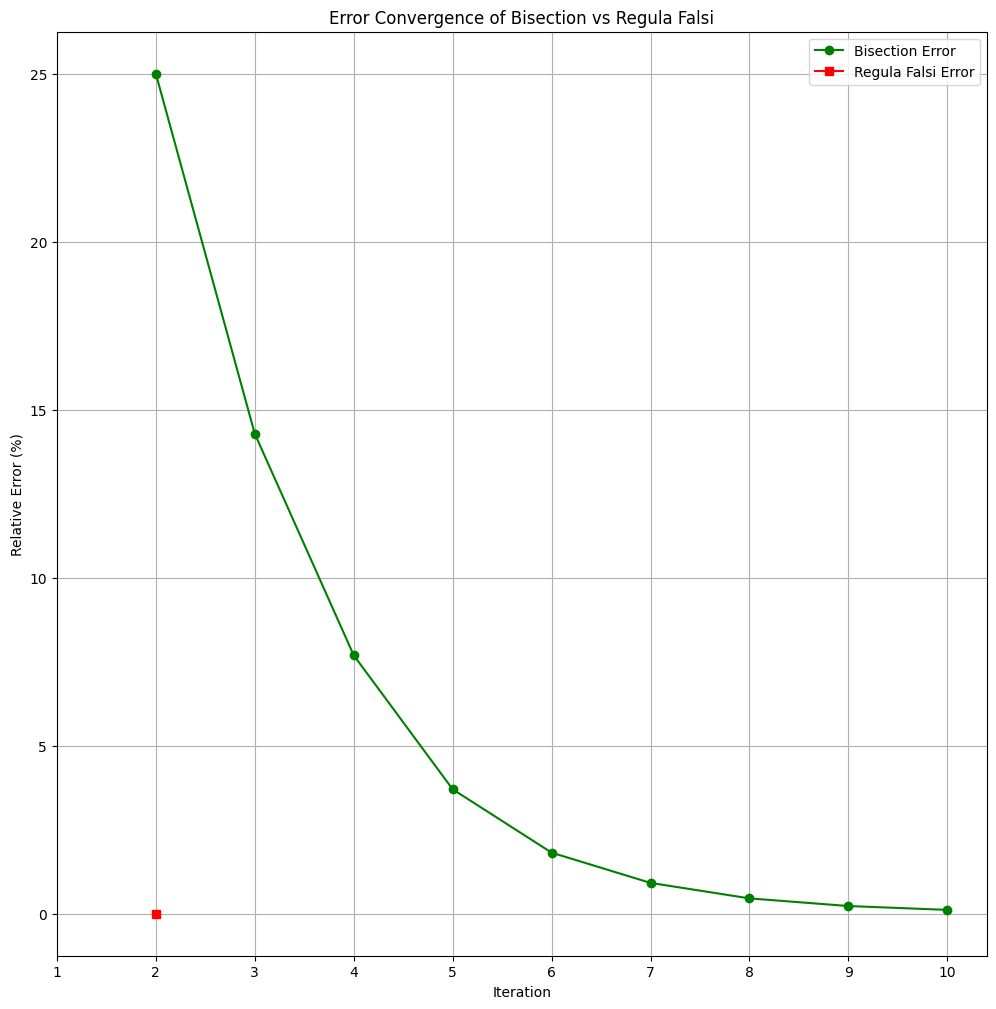

In [38]:
#imports

from tabulate import tabulate
import sys
import matplotlib.pyplot as plt

#helper functions

def graph(bisection, regulafalsi):
  bisection[0] = None
  regulafalsi[0] = None

  plt.figure(figsize=(12,12))

  plt.plot(range(1, len(bisection) + 1), bisection, marker='o', linestyle='-', color='g', label="Bisection Error")
  plt.plot(range(1, len(regulafalsi) + 1), regulafalsi, marker='s', linestyle='-', color='r', label="Regula Falsi Error")

  plt.title("Error Convergence of Bisection vs Regula Falsi")
  plt.xlabel("Iteration")
  plt.ylabel("Relative Error (%)")
  plt.legend()
  plt.grid(True)
  plt.xticks(range(1, max(len(bisection), len(regulafalsi)) + 1))

  plt.show()



def get_relative_error(new, old):
  if old is None:
    return "----"
  if new == 0:
    return 0
  return abs((new - old) / new) * 100

def get_midpoint(x, y):
  return (x + y ) / 2

def solve(func, x):
  return eval(func, {"x": x})

def findXr(lower, upper, FXl, FXu):
  return upper - ((FXu * (lower - upper)) / (FXl - FXu))

def bisection(func, lower, upper, accepted_error, max_iter):
  result = []
  iteration = 0
  Xl = lower
  Xu = upper
  Xr_old = None

  while iteration < max_iter:
    iteration += 1

    Xr_new = get_midpoint(Xl, Xu)
    FXl = solve(func, Xl)
    FXr = solve(func, Xr_new)


    error = get_relative_error(Xr_new, Xr_old)

    result.append([iteration, Xl, Xr_new, Xu, FXl, FXr, error])

    if error != "----" and error <= accepted_error:
      return result

    Xr_old = Xr_new
    if FXl * FXr < 0:
      Xu = Xr_new
    else:
      Xl = Xr_new

  return result

def regulafalsi(func, lower, upper, accepted_error, max_iter):
  result = []
  iteration = 0
  Xl = lower
  Xu = upper
  Xr_old = None

  while iteration < max_iter:
    iteration += 1


    FXl = solve(func, Xl)
    FXu = solve(func, Xu)
    Xr_new = findXr(Xl, Xu, FXl, FXu)
    FXr = solve(func, Xr_new)



    error = get_relative_error(Xr_new, Xr_old)

    result.append([iteration, Xl, Xu, FXl, FXu, Xr_new, FXr, error])

    if error != "----" and error <= accepted_error:
      return result

    Xr_old = Xr_new
    if FXl * FXr < 0:
      Xu = Xr_new
    else:
      Xl = Xr_new

  return result




if __name__ == "__main__":

  function = input("Enter a function: ")
  lower = float(input("Enter the lower range: "))
  upper = float(input("Enter the upper range: "))
  accepted_error = float(input("Enter the acceptable relative error: "))
  max_iter = int(input("Enter max iteration:"))
  print("\n")


  if solve(function, lower) * solve(function, upper) > 0:
    raise Exception("invalid guess")

  bisection_header = ["n", "Xl", "Xr", "Xu", "f(Xl)", "f(Xr)", "Ea"]
  bisection_data = bisection(function, lower, upper, accepted_error, max_iter)
  bisection_errors = [row[-1] for row in bisection_data]
  print(f"Finding root of {function} with Bisection Method")
  print(tabulate(bisection_data, headers=bisection_header, tablefmt="grid"))
  print("The root approximation is: ", bisection_data[-1][2])
  print("\n\n")

  regulafalsi_header = ["n", "Xl", "Xu", "f(Xl)", "f(Xu)", "Xr", "f(Xr)", "Ea"]
  regulafalsi_data = regulafalsi(function, lower, upper, accepted_error, max_iter)
  regulafalsi_errors = [row[-1] for row in regulafalsi_data]
  print(f"Finding root of {function} with Regula Falsi Method")
  print(tabulate(regulafalsi_data, headers=regulafalsi_header, tablefmt="grid"))
  print("The root approximation is: ", regulafalsi_data[-1][5])

  graph(bisection_errors, regulafalsi_errors)




2.5